## Short Term Wind Climate 
To estimate the short term wind climate of the three areas of interest we follow a "To Do" list: 

**0. Import Libraries**

**0.1 Set up File Paths**

**1. Set Turbine Design:**
- Hub height
- Rotor diameter 
- Model etc

**1.2 Plot the field of interest together with the met masts**

**2. Short Term Wind Climate**

**3. Pre select measured data needed:**

**3.1 Wind Measurements:**
- Wind speed
- Wind direction 
- Turbulence intensity

**3.2 Environmental Measurements:**
- Humidity 
- Pressure
- Temperature

**4. Set pre-filtered file**
- compare wind speed original measurements with mcp group  
- Select only the data needed for environment and wind measurements

**5. Filter data: (report page 30 - 33)**
- Outliers in wind speed and direction 
- Suspicious data such as freezes 
- Datagaps 

**4. Interpolate:**
- Interpolate to the  one height of interest (= 150 meters for current turbine)

**7. Compare the both met masts:**
- Scatterplot: windspeed 150 m height mast one against windspeed 150m height mast 2 
- Same with the wind direction 
- Correlate with r^2 - linear correlation for both

**8. SHORT TERM ANALYSIS**
- Mean, stdv of monthly and annual ws 
- Wind roses 
- Select parameters for Weibull model 
- Plot Weibull model 
- Diurnal profile of wind speed (blue) and wind direction (red) at HKW at 100 m MSL
- Monthly profile of the wind speed 
- Power curve of such a turbine
- Annual production of one turbine
- Annual production of wind farm


#### 0. Import Libraries  

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import xarray as xr
import pandas as pd
import os
import netCDF4 as nc
from netCDF4 import Dataset

#### 0.1 File Paths

In [2]:
# Data Paths
bouy6_path = 'data/measurements/2023-11-06_Buoy6_BSH_N-9.nc'
bouy2_path = 'data/measurements/2023-11-09_Buoy2_BSH_N-9.nc'
era5_path = 'data/reanalysis/'
turbines_existing_path = 'data/turbine-info/coordinates/existing/'
turbines_planned_future_path = 'data/turbine-info/coordinates/planned_future/'
turbines_planned_in_operation_before_2030_path = 'data/turbine-info/coordinates/planned_in_operation_before_2030/'
turbines_planned_netherlands_path = 'data/turbine-info/coordinates/planned_netherlands/'
turbines_area_of_interest_path = 'data/turbine-info/coordinates/area_of_interest/'
shapefiles_DEU_path = 'data/shapefiles/DEU/*'
shapefiles_DNK_path = 'data/shapefiles/DNK/*'
shapefiles_NLD_path = 'data/shapefiles/NLD/*'
turbine_power_curves_path = 'data/turbine-info/power_curves/'

#### 0.2 Overwiev netCDF4 files 

In [8]:
# Print all the head groups first with enumeration
for group_count, group_name in enumerate(ncfile.groups):
    group = ncfile.groups[group_name]
    print(f"Group Nr. {group_count + 1}: {group_name}")


NameError: name 'ncfile' is not defined

#### 1. Set the Turbine Design: 
- International Energy Agency (IEA) for a 15 MW offshore wind turbine
- Turbine name: IEA-15MW-D240-H150
-rotor diameter:  240 meters
- hub height: 150 meters

With that we say the height of interest is the one, nearest on the hub height: 140 m 


#### 1.2 Plot the area of interest

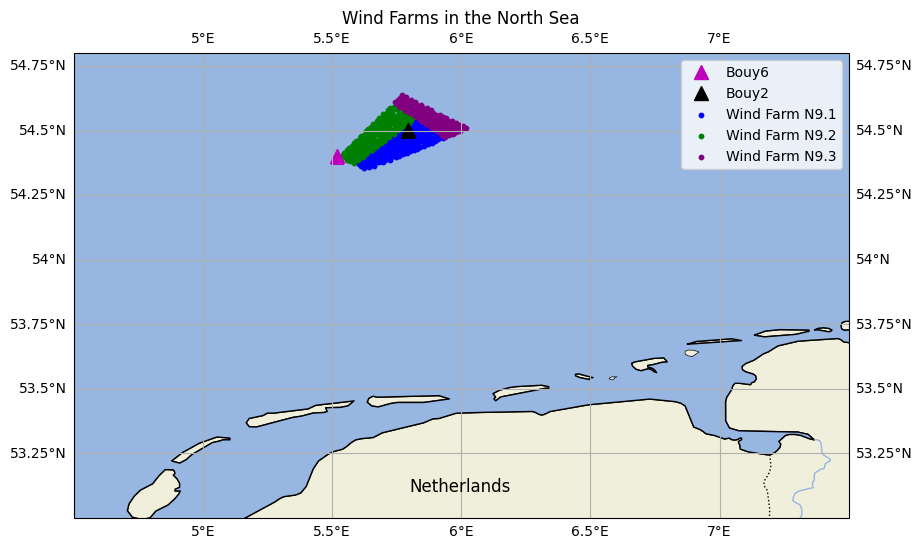

In [3]:
# Define the file paths
base_path = turbines_area_of_interest_path
file_N9_1 = f'{base_path}\layout-N-9.1.geom.csv'
file_N9_2 = f'{base_path}\layout-N-9.2.geom.csv'
file_N9_3 = f'{base_path}\layout-N-9.3.geom.csv'

# Load the data
data_N9_1 = pd.read_csv(file_N9_1)
data_N9_2 = pd.read_csv(file_N9_2)
data_N9_3 = pd.read_csv(file_N9_3)

def plot_wind_farm(data, title, ax, color):
    ax.scatter(data['x'], data['y'], transform=ccrs.UTM(zone=32), label=title, color=color, s=10)
    ax.legend()

# Create a plot with cartopy
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

ax.plot(5.521086, 54.40289, 'm^' , markersize=10, transform=ccrs.PlateCarree(), label='Bouy6', )
ax.plot(5.792266, 54.50248, 'k^', markersize=10, transform=ccrs.PlateCarree(), label='Bouy2')

ax.text(5.8, 53.1, 'Netherlands', transform=ccrs.Geodetic(), fontsize=12)

# Plot each wind farm field
plot_wind_farm(data_N9_1, 'Wind Farm N9.1', ax, 'blue')
plot_wind_farm(data_N9_2, 'Wind Farm N9.2', ax, 'green')
plot_wind_farm(data_N9_3, 'Wind Farm N9.3', ax, 'purple')

# Set extent (bounding box) to focus on the wind farms
ax.set_extent([4.5, 7.5, 53, 54.8], crs=ccrs.PlateCarree())

# Add gridlines
ax.gridlines(draw_labels=True)

plt.title('Wind Farms in the North Sea')
plt.show()

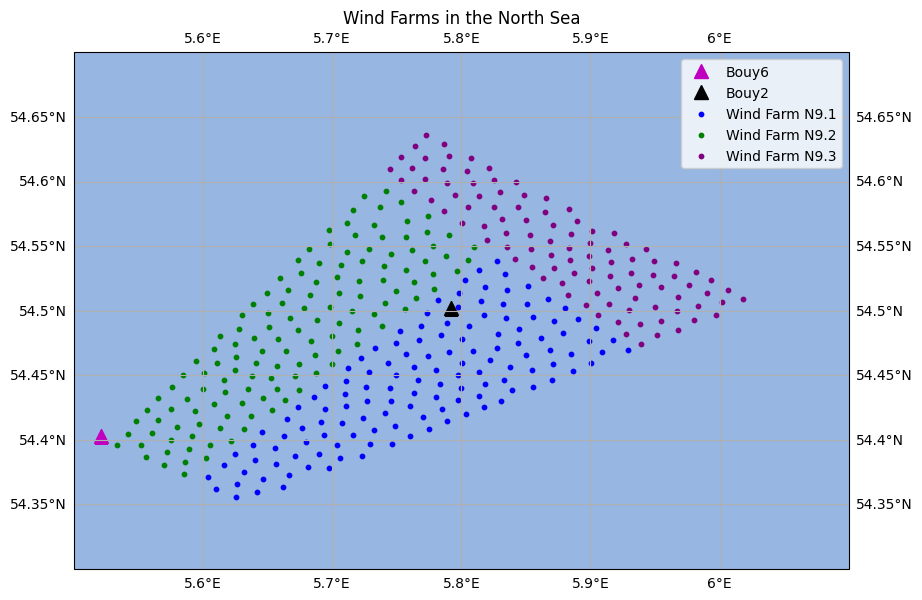

In [4]:
# Second plot but zoomed in: 

def plot_wind_farm(data, title, ax, color):
    ax.scatter(data['x'], data['y'], transform=ccrs.UTM(zone=32), label=title, color=color, s=10)
    ax.legend()

# Create a plot with cartopy
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

ax.plot(5.521086, 54.40289, 'm^' , markersize=10, transform=ccrs.PlateCarree(), label='Bouy6', )
ax.plot(5.792266, 54.50248, 'k^', markersize=10, transform=ccrs.PlateCarree(), label='Bouy2')

# Plot each wind farm field
plot_wind_farm(data_N9_1, 'Wind Farm N9.1', ax, 'blue')
plot_wind_farm(data_N9_2, 'Wind Farm N9.2', ax, 'green')
plot_wind_farm(data_N9_3, 'Wind Farm N9.3', ax, 'purple')

# Set extent (bounding box) to focus on the wind farms
ax.set_extent([5.5, 6.1, 54.3, 54.7], crs=ccrs.PlateCarree())

# Add gridlines
ax.gridlines(draw_labels=True)

plt.title('Wind Farms in the North Sea')
plt.show()

**3. Pre select measured data needed:**

**3.1 Wind Measurements:** 
- Wind speed
- wind direction 
- turbulence intensity

**3.2 Environmental Measurements:**
- Humidity 
- Pressure
- Temperature

**4. Pre Filter nc Files:**  
- select only the data needed for Enviroment and Wind Measurements
- select one height of interest (e.g. 94, or 140) for selected turbine Design

**5. set pre- filtered file in one dataframe**

In [5]:
# Height of interest 3. place in the 6. dimension of the ds = dataset
heights = [14, 42, 94, 140, 200, 250]
height_idx = 3

# Function to process buoy data for the specific height
def process_buoy_data(file_path, group_name):
    # Open the nc file
    ds = Dataset(file_path)
    
    # Extract the time variable
    time = ds.variables['time']
    time = nc.num2date(time[:], time.units)
    
    # Extract the group
    group = ds.groups[group_name]
    
    # Extract variables
    wind_speed = group.variables['wind_speed'][:]
    wind_from_direction = group.variables['wind_from_direction'][:]
    wind_from_direction_availability = group.variables['wind_from_direction_availability'][:]
    turbulence_intensity = group.variables['turbulence_intensity'][:]
    
    # Create DataFrame
    df = pd.DataFrame({
        'time': time,
        'wind_speed': wind_speed[:, 0, 0, height_idx],
        'wind_from_direction': wind_from_direction[:, 0, 0, height_idx],
        'wind_from_direction_availability': wind_from_direction_availability[:, 0, 0, height_idx],
        'turbulence_intensity': turbulence_intensity[:, 0, 0, height_idx]
    })
    
    # Set time as the index
    #df.set_index('time', inplace=True)
    
    return df

# Process buoy 6 data
bouy6_data = process_buoy_data(bouy6_path, 'ZX_LIDAR_WLBZ_6')

# Process buoy 2 data
bouy2_data = process_buoy_data(bouy2_path, 'ZX_LIDAR_WLBZ_2')

bouy2_data


,time,wind_speed,wind_from_direction,wind_from_direction_availability,turbulence_intensity
0,2022-03-03 00:00:00,NaN,NaN,NaN,NaN
1,2022-03-03 00:10:00,NaN,NaN,NaN,NaN
2,2022-03-03 00:20:00,NaN,NaN,NaN,NaN
3,2022-03-03 00:30:00,NaN,NaN,NaN,NaN
4,2022-03-03 00:40:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
67675,2023-06-15 23:10:00,NaN,NaN,NaN,NaN
67676,2023-06-15 23:20:00,NaN,NaN,NaN,NaN
67677,2023-06-15 23:30:00,NaN,NaN,NaN,NaN
67678,2023-06-15 23:40:00,NaN,NaN,NaN,NaN


In [6]:
import netCDF4 as nc
import pandas as pd
import os

# Data Paths
lidar_path = 'data/measurements/'
era5_path = 'data/reanalysis/'
turbines_existing_path = 'data/turbine-info/coordinates/existing/'
turbines_planned_future_path = 'data/turbine-info/coordinates/planned_future/'
turbines_planned_in_operation_before_2030_path = 'data/turbine-info/coordinates/planned_in_operation_before_2030/'
turbines_planned_netherlands_path = 'data/turbine-info/coordinates/planned_netherlands/'
turbines_area_of_interest_path = 'data/turbine-info/coordinates/area_of_interest/'
shapefiles_DEU_path = 'data/shapefiles/DEU/*'
shapefiles_DNK_path = 'data/shapefiles/DNK/*'
shapefiles_NLD_path = 'data/shapefiles/NLD/*'
turbine_power_curves_path = 'data/turbine-info/power_curves/'

# Files to be processed
bouy6_path = os.path.join(lidar_path, '2023-11-06_Buoy6_BSH_N-9.nc')
bouy2_path = os.path.join(lidar_path, '2023-11-09_Buoy2_BSH_N-9.nc')

# Height index of interest (third place in the sixth dimension of the dataset)
height_idx = 3

# Function to process buoy data for the specific height
def process_buoy_data(file_path, group_name, height_idx):
    # Open the nc file
    ds = nc.Dataset(file_path)
    
    # Extract the time variable
    time_var = ds.variables['time']
    time = nc.num2date(time_var[:], time_var.units)
    
    # Extract the group
    group = ds.groups[group_name]
    
    # Extract variables for the specified height index
    wind_speed = group.variables['wind_speed'][:, :, :, height_idx]
    wind_from_direction = group.variables['wind_from_direction'][:, :, :, height_idx]
    wind_from_direction_availability = group.variables['wind_from_direction_availability'][:, :, :, height_idx]
    turbulence_intensity = group.variables['turbulence_intensity'][:, :, :, height_idx]
    
    # Create DataFrame
    df = pd.DataFrame({
        'time': time,
        'wind_speed': wind_speed.flatten(),
        'wind_from_direction': wind_from_direction.flatten(),
        'wind_from_direction_availability': wind_from_direction_availability.flatten(),
        'turbulence_intensity': turbulence_intensity.flatten()
    })
    
    # Set time as the index
    df.set_index('time', inplace=True)
    
    return df

# Process buoy 6 data
bouy6_data = process_buoy_data(bouy6_path, 'ZX_LIDAR_WLBZ_6', height_idx)

# Process buoy 2 data
bouy2_data = process_buoy_data(bouy2_path, 'ZX_LIDAR_WLBZ_2', height_idx)

bouy2_data


,wind_speed,wind_from_direction,wind_from_direction_availability,turbulence_intensity
time,,,,
2022-03-03 00:00:00,NaN,NaN,NaN,NaN
2022-03-03 00:10:00,NaN,NaN,NaN,NaN
2022-03-03 00:20:00,NaN,NaN,NaN,NaN
2022-03-03 00:30:00,NaN,NaN,NaN,NaN
2022-03-03 00:40:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-06-15 23:10:00,NaN,NaN,NaN,NaN
2023-06-15 23:20:00,NaN,NaN,NaN,NaN
2023-06-15 23:30:00,NaN,NaN,NaN,NaN
